## Importing Libaries

In [77]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.colors as colors

## Scrapping
from bs4 import BeautifulSoup

## NLP
import contractions
import inflect
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [78]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('white')

## Visualization Settings

In [79]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [80]:
df = pd.read_csv('mbti_1.csv')

In [81]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [83]:
df.shape

(8675, 2)

## Sample List of Posts

In [84]:
[p.split('|||') for p in df.head(7).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

The number of users is __8675__

## Mapping Personalities

In [85]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [86]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## EDA

<Figure size 432x288 with 0 Axes>

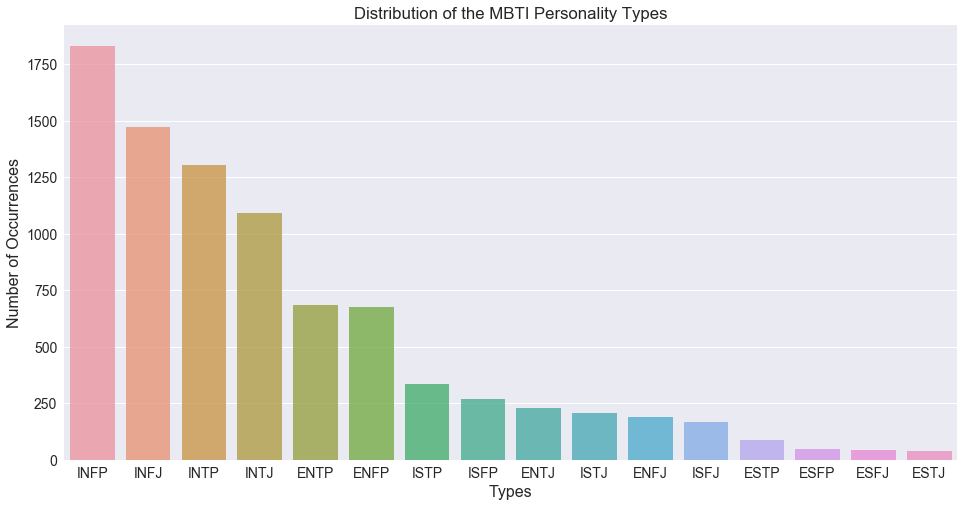

In [87]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
#plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. This is __`unbalanced`__ data as we can understand from the graphic.

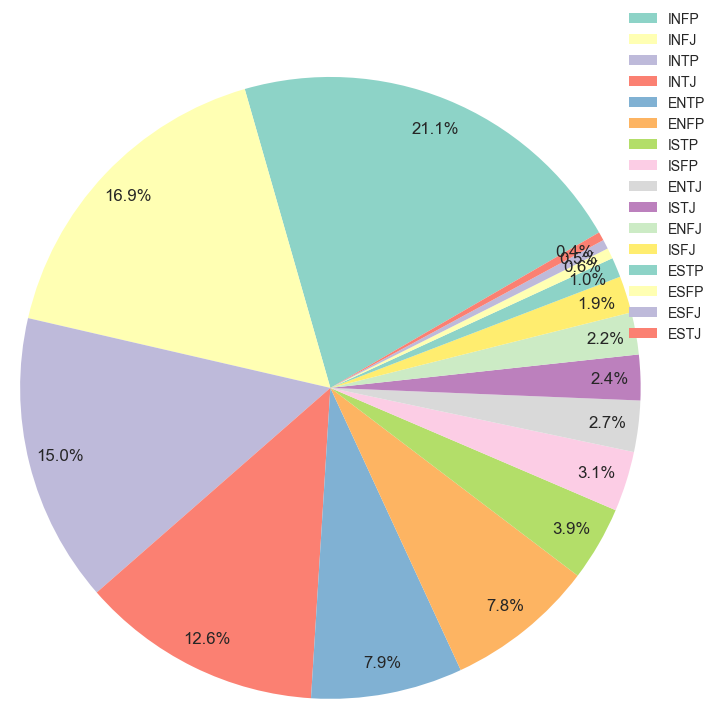

In [88]:
# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

In [89]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [90]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

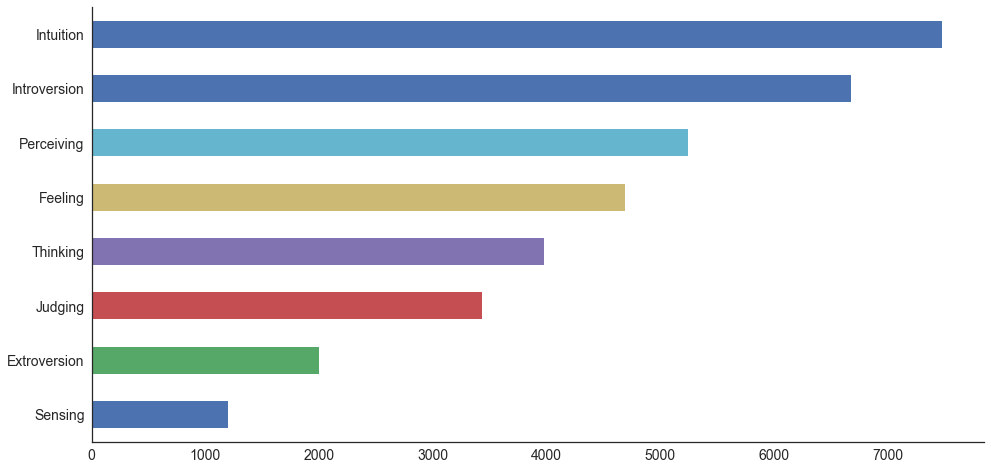

In [91]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh()
sns.despine()

In [92]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [93]:
def get_types(person):
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': 
        I = 1
    elif selected_type[0] == 'E': 
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': 
        N = 1
    elif selected_type[1] == 'S': 
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': 
        T = 1
    elif selected_type[2] == 'F': 
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': 
        J = 1
    elif selected_type[3] == 'P': 
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [94]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [95]:
df= data
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know y

In [96]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[1], " - ", df['IE'].value_counts()[0])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[1], " - ", df['NS'].value_counts()[0])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[1], " - ", df['TF'].value_counts()[0])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[1], " - ", df['JP'].value_counts()[0])

Introversion (I) - Extroversion (E):	 6676  -  1999
Intuition    (N) – Sensing      (S):	 7478  -  1197
Thinking     (T) – Feeling      (F):	 3981  -  4694
Judging      (J) – Perceiving   (P):	 3434  -  5241


<Figure size 432x288 with 0 Axes>

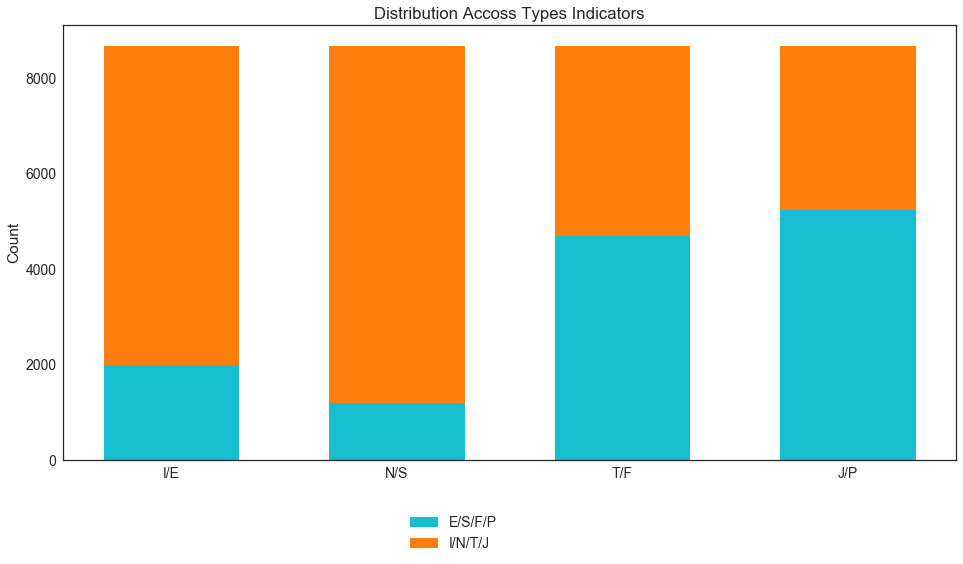

In [97]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('E/S/F/P', 'I/N/T/J'), loc=1, bbox_to_anchor=(0.5,-0.1))
plt.show()


Let's check length of posts

In [98]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

Average Post Length:  7234.98962536023


<Figure size 432x288 with 0 Axes>

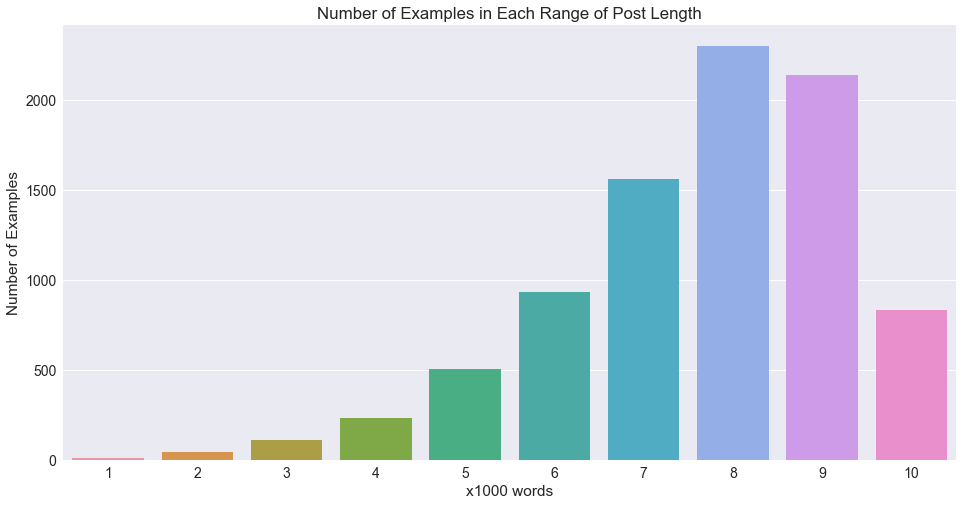

In [99]:
visualization_settings()
ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()
sns.barplot(cnt.index, cnt.values)
sns.set_style('white')
sns.despine()
plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

print('Average Post Length: ', df['post_length'].mean()) # can be used to decide the no of features we should consider

<Figure size 432x288 with 0 Axes>

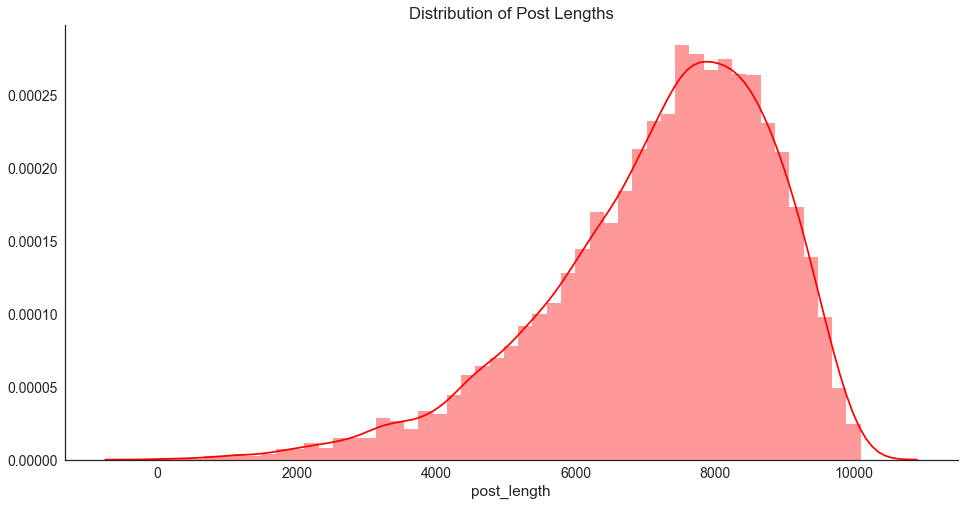

In [100]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='red').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts)

<Figure size 432x288 with 0 Axes>

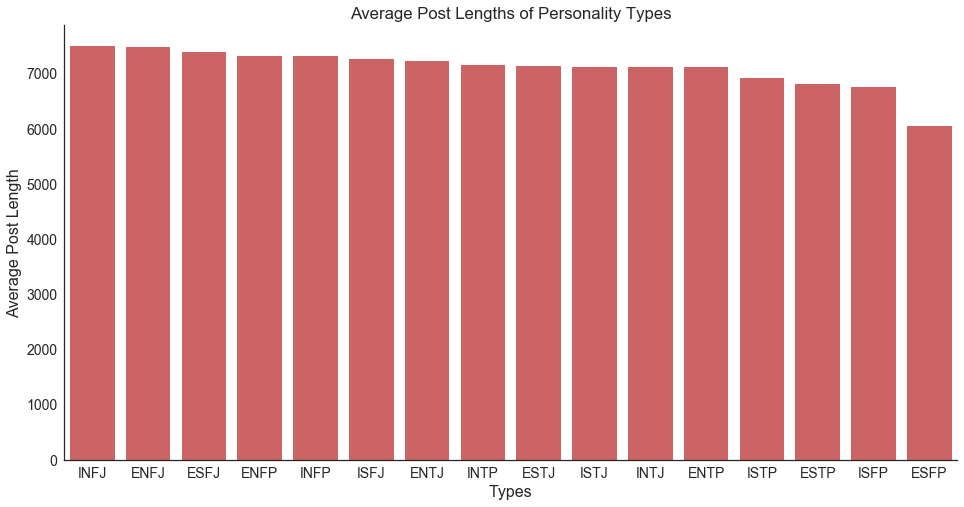

In [101]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[6])

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__

In [102]:
## words_per_comment shows how many words there appears in each comment block for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

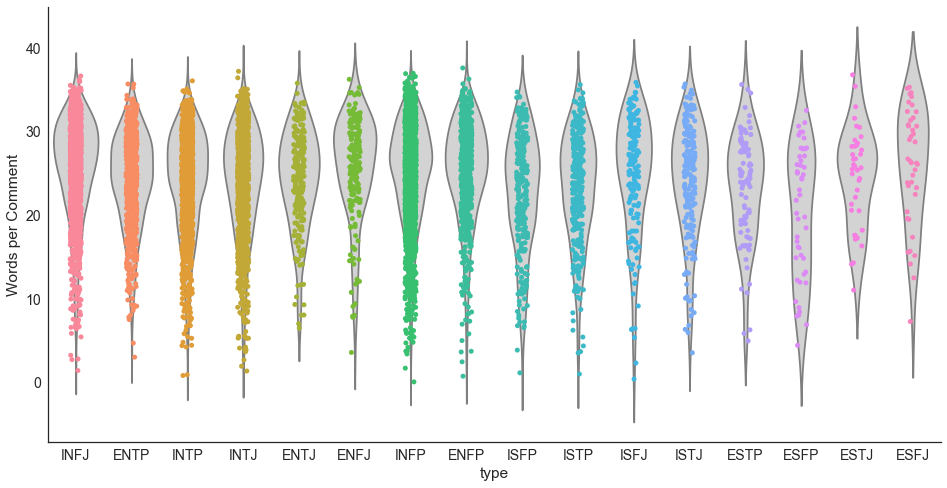

In [103]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()

#### As we can figure out from the graphic Extraversion personality type has less variance for words for each comment, particularly last 4 types are Extroversion.

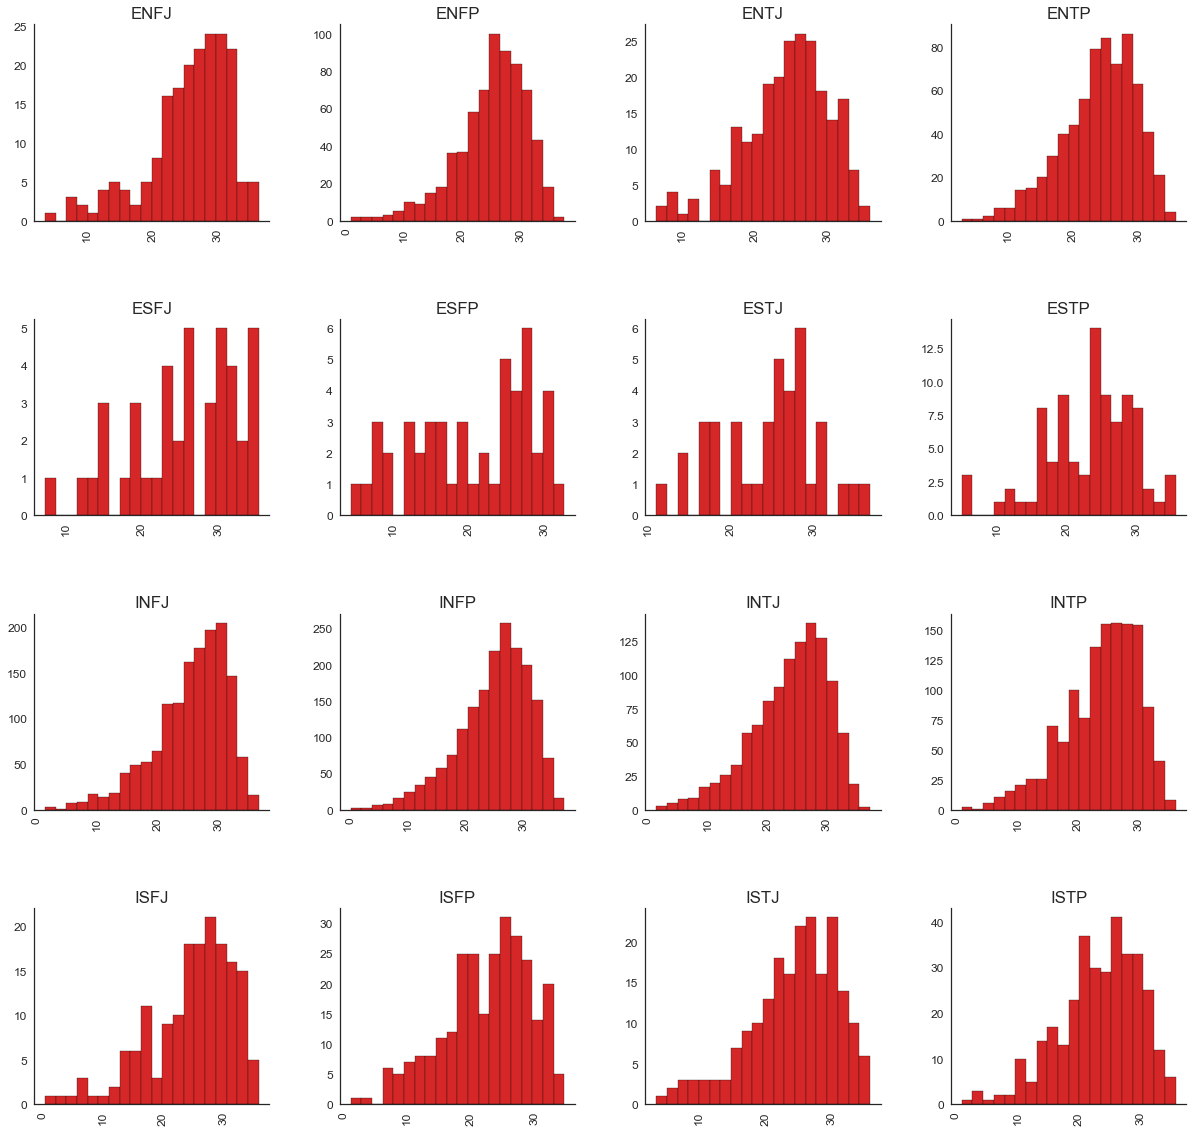

In [104]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=20,xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[6], edgecolor='black') 
sns.despine()

## Feature Correlation

In [105]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

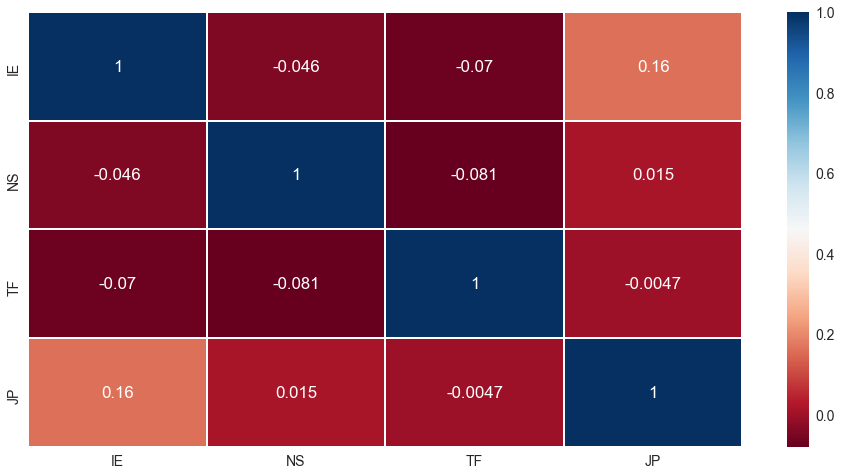

In [106]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## World Cloud

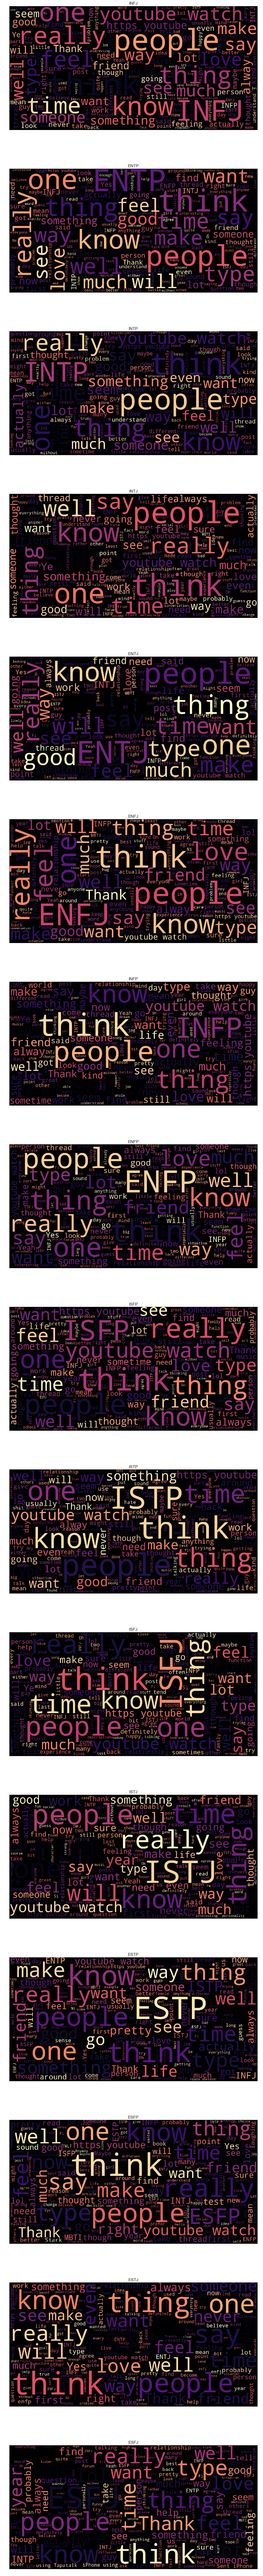

In [31]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(18,12*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_temp = df[df['type'] == i]
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(df_temp['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

## Data Preprocessing

In [32]:
## Apply and Map Fuction with String

#def keep_words(text):
    #return re.sub(r'[^a-zA-Z]', ' ', text)
# df_2['clean_text'] = df_2.apply(lambda x: keep_words(x['posts']),axis=1)
# df_2['clean_text'] = df_2['clean_text'].map(keep_words)

In [33]:
df_2 = pd.DataFrame()
df_2 = df.copy()

In [110]:
#preprocess all the mbti data
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

ps = PorterStemmer()
lemmatiser = WordNetLemmatizer()
                                              
def normalize_corpus(text, lowercase=True, remove_stop_words=True, remove_mbti_profiles=True, remove_url=True):
    
    """[1] Lowercase the text 
       [2] Find URLs 
       [3] Remove links from posts 
       [4] Expending contractions 
       [5] Removing ||| seperators 
       [6] Removing whitespace 
       [7] Keep only words 
       [8] Remove apostrophe sign  
       [9] Remove stopwords and Stemming 
      [10] Remove MBTI profiles from the posts and <MBTI> instead """
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    ##[1] Lowercase the text
    if (lowercase==True):
        text = str(text).lower()
    
    ##[2] Find URLs
    global URLs
    URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+', text)
    #URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    
    ##[3] Removing Links 
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'', text)
    
    ##[4] Expending contractions such as I'm, you're into I am, you are
    text = contractions.fix(text)
    
    ##[5] Removing ||| seperators
    text = re.sub(r'\|\|\|', r' ', text) 
    
    ##[6] Removing whitespace
    text = re.sub(r'nbsp', r'', text)
    
    ##[7] Keeping only words
    text = re.sub(r'[^a-zA-Z]',r' ', text)
    
    ##[8] Removing ' (apostrophe) sign
    text = re.sub(r"'", r'', text)    
    
    ##[9] Removing stopwords and Lemmatization
    if (remove_stop_words==True):
        
        text = " ".join([ps.stem(w) for w in text.split(' ') if w not in stopword_list])
        
    else:
        
        text = " ".join([ps.stem(w) for w in text.split(' ')])
    
    ##[10] Removing MBTI types and prelace with <MBTI> word
    if (remove_mbti_profiles == True):
        text = re.sub(r'intp', r'', text)
        text = re.sub(r'intj', r'', text)
        text = re.sub(r'infj', r'', text)
        text = re.sub(r'infp', r'', text)
        text = re.sub(r'entp', r'', text)
        text = re.sub(r'enfp', r'', text)
        text = re.sub(r'istp', r'', text)
        text = re.sub(r'entj', r'', text)
        text = re.sub(r'isfj', r'', text)
        text = re.sub(r'enfj', r'', text)
        text = re.sub(r'isfp', r'', text)
        text = re.sub(r'esfp', r'', text)
        text = re.sub(r'estp', r'', text)
        text = re.sub(r'estj', r'', text)
        text = re.sub(r'esfj', r'', text)
        text = re.sub(r'istj', r'', text)
        
    return text

In [111]:
## This clean_text contains MBTI profile names in the posts.
df_2['clean_text'] = df_2['posts'].map(lambda text: normalize_corpus(text, remove_mbti_profiles=False))

In [112]:
## text_without_mbti column does not contain any MBTI profiles in the posts. All MBTI profiles which alreay mentioned in the posts have been removed to make prediction more realistic
df_2['clean_text_without_mbti'] = df_2['posts'].map(lambda text: normalize_corpus(text, remove_mbti_profiles=True))

In [122]:
URLs

['http://www.youtube.com/watch?v=6eew-9ndm5k',
 'http://www.youtube.com/watch?v=i1gmxmtwugs&amp;feature=plcp',
 'http://www.youtube.com/watch?v=elpmmet69ce']

In [123]:
## We can select 5 random cleaned_text from our corpus
#df_2.iloc[np.random.choice(len(df_2),2)]
df_2.head(2)

type  \
0  INFJ   
1  ENTP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http:

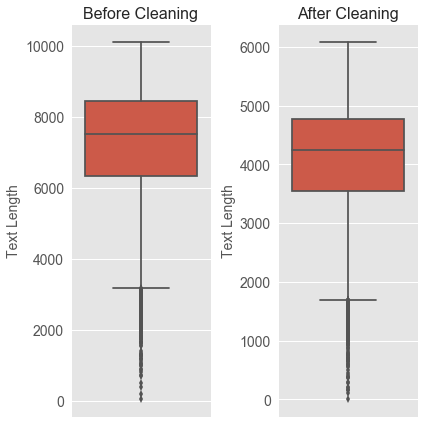

In [124]:
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
plt.style.use('ggplot')

fig, axs = plt.subplots(ncols=2, figsize=(6,6))
sns.boxplot(y=df_2['post_length'], ax=axs[0])
sns.boxplot(y=df_2['clean_text'].map(len), ax=axs[1])

axs[0].set_ylabel('Text Length', fontsize=14)
axs[1].set_ylabel('Text Length', fontsize=14)


axs[0].set_title('Before Cleaning', fontsize=16)
axs[1].set_title('After Cleaning', fontsize=16)
plt.tight_layout()
plt.show()

In [125]:
df_2['clean_text'].map(lambda x: word_tokenize(x))

0                                                    [enfp, intj, moment, sportscent, not, top, ten, play, prank, life, chang, experi, life, repeat, today, may, perc, experi, immers, last, thing, infj, friend, post, facebook, commit, suicid, next, day, rest, peac, hello, enfj, sorri, hear, distress, natur, relationship, not, perfect, time, everi, moment, exist, tri, figur, hard, time, time, growth, welcom, stuff, game, set, match, prozac, wellbrutin, least, thirti, minut, move, leg, not, mean, move, sit, desk, chair, weed, moder, mayb, tri, edibl, healthier, altern, basic, come, three, item, determin, type, whichev, type, want, would, like, use, given, type, cognit, function, whatnot, left, thing, moder, sim, inde, video, game, good, ...]
1                    [find, lack, post, alarm, sex, bore, posit, often, exampl, girlfriend, current, environ, creativ, use, cowgirl, missionari, not, enough, give, new, mean, game, theori, hello, entp, grin, take, convers, flirt, acknowledg, presenc, 

In [126]:
from collections import Counter

In [127]:
df_2['word_freq'] = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

# This method for sorting unless use most_common
#df_2['word_freq'] = df_2['word_freq'].map(lambda x: sorted(x.items(), key=lambda y: y[1], reverse=True))

In [128]:
df_2.head(1)

type  \
0  INFJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   

   post_length  IE  JP  NS  TF  words_per_comment  \
0         4652   1   1   1   0              11.12   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [129]:
most_commons = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

In [130]:
import operator

a = list(map(operator.itemgetter(1), most_commons[0]))
b = list(map(operator.itemgetter(0), most_commons[0]))

## Splitting Into Train and Test Set

In [131]:
## We split the data 80% as train set and 20% as test set

def spliting_train_test(text, target):

    X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2, random_state=33)
    return X_train, X_test, y_train, y_test

In [132]:
# X_train, X_test, y_train, y_test for with MBTI profile names in clean text
X_train, X_test, y_train, y_test = spliting_train_test(df_2['clean_text'], df_2['type'])


# X_train_1, X_test_1, y_train_1, y_test_1 for withou MBTI profile names in clean text
X_train_1, X_test_1, y_train_1, y_test_1 = spliting_train_test(df_2['clean_text_without_mbti'], df_2['type'])



In [133]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train_1.shape, X_test_1.shape))

Train Set Shape		:(6940,)
Test Set Shape		:(1735,)


There is no missing value in our dataset, which is good.

## CountVectorizing

In [164]:
# count_vect ==> with MBTI profile names in clean text
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)


# count_vect_1 ==> without MBTI profile names in clean text
count_vect_1 = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train_1 = count_vect_1.fit_transform (X_train_1)
count_vect_train_1 = count_vect_train_1.toarray()
count_vect_test_1 = count_vect_1.transform(X_test_1)


count_vect_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [165]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 4000
Longest word   : straightforward


In [166]:
vocab = count_vect.get_feature_names()

In [170]:
#vocab = count_vect.get_feature_names()
pd.DataFrame(count_vect_train, columns=vocab).head()

abandon  abil  abl  abnorm  abort  abroad  absenc  absent  absolut  absorb  abstract  absurd  abus  academ  accent  accept  access  accid  accident  accommod  accomplish  accord  account  accur  accuraci  accus  ace  achiev  acid  acknowledg  acquaint  acquir  across  act  action  activ  actor  actress  actual  ad  adam  adapt  add  addict  addit  address  adhd  adher  adjust  admin  administr  admir  admit  admittedli  adopt  ador  adrenalin  adult  advanc  advantag  adventur  advertis  advic  advis  advoc  aesthet  affair  affect  affection  affirm  afford  afraid  africa  afternoon  afterward  age  agenda  agent  aggress  agnost  ago  agre  agreement  ah  aha  ahead  ahem  ahh  ahhh  ai  aid  aim  air  aka  al  ala  alarm  albeit  album  alcohol  alert  algebra  alic  alien  align  \
0        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       0       0      0         0         0           0       0        0      1         0      0    0       0     0           0         0       0       0    1       0      0      0        0       0   0     0      0    0       0      0        0     0      0       0      0          0      0      0           0      0     1          0      0       0         0         0         0      0      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    0     0          0   0    0      0     0    0     0   0    0    0    0    0   0    1      0       0      0        0      0        0     0      0      0   
1        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       1       0      0         0         0           0       0        0      0         0      0    0       1     0           0         0       0       0    1       0      0      0        0       1   0     0      0    2       0      0        0     1      0       0      0          0      0      0           0      0     0          0      0       0         0         1         0      0      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    1     2          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0   
2        0     0    0       0      0       0       0       0        0       0         0       0     1       0       0       3       0      0         0         0           1       0        1      0         0      0    0       0     0           0         0       0       0    0       0      0      0        0       2   0     0      0    0       1      0        0     3      0       0      0          0      0      1           0      0     0          0      0       0         0         0         0      1      0      0        0       0       0          0       0       0       0       0          0          0    0       0      0        0       0    4     0          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0   
3        0     0    0       0      0       0       0       0        0       0         0       0     0       0       0       0       0      0         0         0           0       0        0      0         0      0    0       0     0           0         0       0       1    0       0      0      0        0       3   0     0      0    2       0      0        0     0      0       0      0          0      0      0           0      0     0          0      0       0         0         0         0      1      0      0        0       0       0          0       0       0       0       0          0          0    1       0      0        0       0    1     0          0   0    0      0     0    0     0   0    0    0    0    0   0    0      0       0      0        0      0        0     0      0      0  

## Tf-idf Vectorizing

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

# With MBTI profiles name in the celan text
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)

# Without MBTI profiles name in the celan text
tfidf_vect_1 = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train_1 = tfidf_vect_1.fit_transform(X_train_1)
tfidf_vect_train_1 = tfidf_vect_train_1.toarray()
tfidf_vect_test_1 = tfidf_vect_1.transform(X_test_1)

In [172]:
print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Longest word: straightforward


In [173]:
vocab = tfidf_vect.get_feature_names()
pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head()

abandon  abil   abl  abnorm  abort  abroad  absenc  absent  absolut  absorb  abstract  absurd  abus  academ  accent  accept  access  accid  accident  accommod  accomplish  accord  account  accur  accuraci  accus  ace  achiev  acid  acknowledg  acquaint  acquir  across   act  action  activ  actor  actress  actual   ad  adam  adapt   add  addict  addit  address  adhd  adher  adjust  admin  administr  admir  admit  admittedli  adopt  ador  adrenalin  adult  advanc  advantag  adventur  advertis  advic  advis  advoc  aesthet  affair  affect  affection  affirm  afford  afraid  africa  afternoon  afterward   age  agenda  agent  aggress  agnost   ago  agre  agreement   ah  aha  ahead  ahem  ahh  ahhh   ai  aid  aim  air  aka   al   ala  alarm  albeit  album  alcohol  alert  algebra  alic  \
0      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.00     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.03       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.00  0.02     0.0    0.0    0.0      0.0    0.00  0.0   0.0    0.0  0.00    0.00    0.0      0.0  0.00    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.04        0.0    0.0     0.0       0.0      0.00       0.0   0.00    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.00  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.06    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
1      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.03     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.00       0.0    0.0  0.0    0.04   0.0         0.0       0.0     0.0    0.00  0.03     0.0    0.0    0.0      0.0    0.02  0.0   0.0    0.0  0.06    0.00    0.0      0.0  0.05    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.04       0.0   0.00    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.02  0.04        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
2      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.05     0.0     0.0    0.10     0.0    0.0       0.0       0.0        0.05     0.0     0.04   0.00       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.00  0.00     0.0    0.0    0.0      0.0    0.04  0.0   0.0    0.0  0.00    0.05    0.0      0.0  0.18    0.0     0.0    0.0        0.0    0.0   0.04         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.00       0.0   0.03    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.00     0.0   0.00      0.0     0.0  0.11  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
3      0.0  0.00  0.00     0.0    0.0     0.0     0.0     0.0     0.00     0.0      0.00     0.0  0.00     0.0     0.0    0.00     0.0    0.0       0.0       0.0        0.00     0.0     0.00   0.00       0.0    0.0  0.0    0.00   0.0         0.0       0.0     0.0    0.04  0.00     0.0    0.0    0.0      0.0    0.06  0.0   0.0    0.0  0.07    0.00    0.0      0.0  0.00    0.0     0.0    0.0        0.0    0.0   0.00         0.0    0.0  0.00        0.0    0.0     0.0       0.0      0.00       0.0   0.03    0.0    0.0      0.0     0.0     0.0        0.0     0.0     0.0     0.0     0.0        0.0        0.0  0.03     0.0   0.00      0.0     0.0  0.03  0.00        0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00    0.0     0.0    0.0      0.0    0.0      0.0   0.0   
4      0.0  0.03  

# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">__PART-1: PREDICTIONS WITHOUT REMOVING MBTI LABELS FROM TEXT__

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;">PREDICTIONS WITH COUNTVECTORIZING

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [175]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [176]:
np.random.seed(1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

## Logistic Regression with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [187]:
logreg_CV = LogisticRegression(random_state=0)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print (classification_report(y_test, y_pred_lr_CV))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

       ENFJ       0.43      0.42      0.43        31
       ENFP       0.46      0.49      0.48       112
       ENTJ       0.61      0.40      0.48        50
       ENTP       0.57      0.50      0.53       145
       ESFJ       0.67      0.22      0.33         9
       ESFP       0.50      0.17      0.25        12
       ESTJ       0.67      0.29      0.40         7
       ESTP       0.67      0.40      0.50        15
       INFJ       0.52      0.59      0.55       269
       INFP       0.63      0.66      0.64       387
       INTJ       0.54      0.56      0.55       214
       INTP       0.56      0.65      0.60       267
       ISFJ       0.69      0.60      0.64        30
       ISFP       0.54      0.34      0.42        58
       ISTJ       0.58      0.45      0.51        47
       ISTP       0.61      0.52      0.56        82

avg / total       0.57      0.56      0.56      1735

-------------------------------------------

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">With GridSearch

In [220]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g = GridSearchCV(estimator=lr_classifierCV, param_grid=parameters, cv=5)

In [223]:
logreg_CV_g.fit(count_vect_train, y_train)
y_pred_lr_CV_g = logreg_CV_g.predict(count_vect_test)
print (classification_report(y_test, y_pred_lr_CV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV_g))

             precision    recall  f1-score   support

       ENFJ       0.46      0.68      0.55        31
       ENFP       0.57      0.60      0.58       112
       ENTJ       0.38      0.54      0.44        50
       ENTP       0.73      0.67      0.70       145
       ESFJ       0.29      0.44      0.35         9
       ESFP       0.15      0.33      0.21        12
       ESTJ       0.25      0.57      0.35         7
       ESTP       0.39      0.60      0.47        15
       INFJ       0.75      0.60      0.67       269
       INFP       0.79      0.72      0.76       387
       INTJ       0.71      0.71      0.71       214
       INTP       0.77      0.73      0.75       267
       ISFJ       0.59      0.73      0.66        30
       ISFP       0.51      0.60      0.56        58
       ISTJ       0.49      0.62      0.55        47
       ISTP       0.63      0.68      0.65        82

avg / total       0.69      0.67      0.68      1735

___________________________________________

In [224]:
logreg_CV_g.best_params_

{'C': 0.05, 'penalty': 'l1'}

In [225]:
logreg_CV_g.best_score_

0.66296829971181559

In [226]:
heat_map_order=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

Text(0.5,65,'Predicted Label')

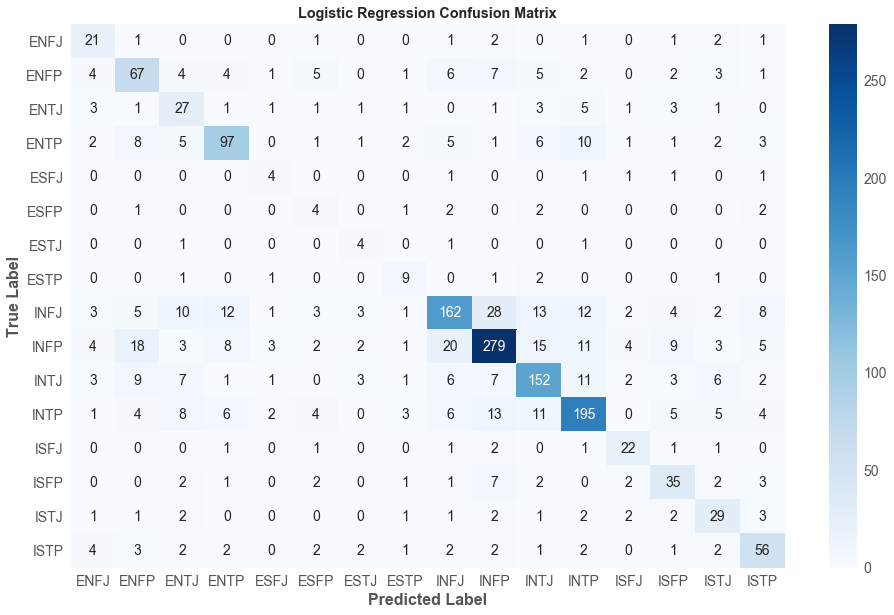

In [231]:
logreg_conf_mat = confusion_matrix(y_test,y_pred_lr_CV_g)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')

## Random Forest with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [388]:
rf_CV = RandomForestClassifier(random_state=0)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.329682997118


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">With GridSearch

In [296]:
parameters = {'n_estimators':[500, 1000, 1500, 2000, 2500, 3000]}

rand_forest_CV = RandomForestClassifier(random_state=0)
rf_CV = GridSearchCV(estimator=rand_forest_CV, param_grid=parameters, cv=5)

In [297]:
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print (classification_report(y_test, y_pred_rf_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.67      0.25      0.36       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.84      0.37      0.51       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.55      0.64      0.59       269
       INFP       0.45      0.90      0.60       387
       INTJ       0.67      0.56      0.61       214
       INTP       0.58      0.76      0.66       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.00      0.00      0.00        47
       ISTP       0.88      0.17      0.29        82

avg / total       0.51      0.54      0.48      1735

___________________________________________

In [199]:
rf_CV.best_params_

{'n_estimators': 2000}

Text(0.5,65,'Predicted Label')

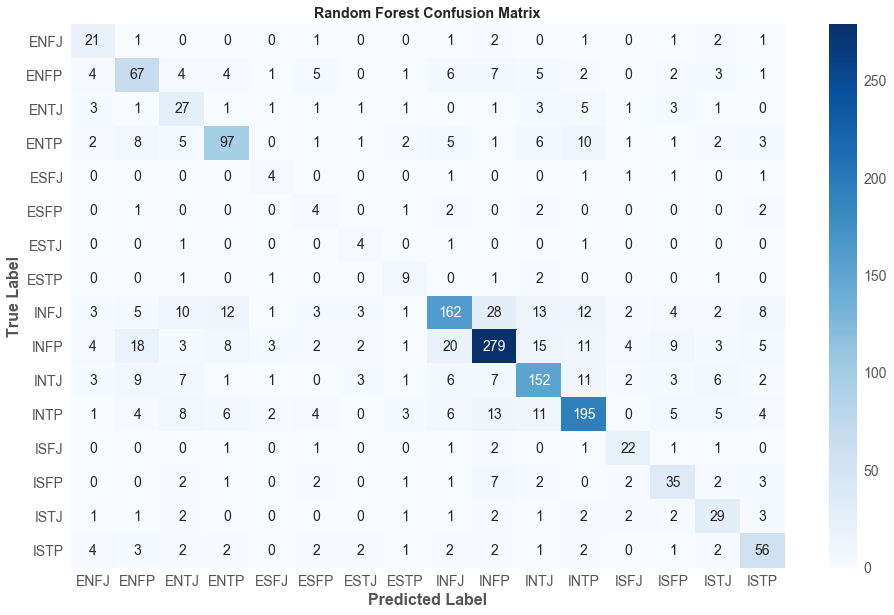

In [232]:
rf_conf_mat = confusion_matrix(y_test,y_pred_rf_CV)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Random Forest Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')

## LinearSVM with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [390]:
ln_SVM_CV = LinearSVC(random_state=0)
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

Accuracy : 0.564265129683


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [264]:
parameters = {'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

linear_SVM_CV = LinearSVC(random_state=0, class_weight='balanced')
ln_SVM_CV = GridSearchCV(estimator=linear_SVM_CV, param_grid=parameters, cv=5)

In [265]:
ln_SVM_CV.fit(count_vect_train, y_train)
y_pred_SVM_CV = ln_SVM_CV.predict(count_vect_test)
print (classification_report(y_test, y_pred_SVM_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_CV))

             precision    recall  f1-score   support

       ENFJ       0.48      0.68      0.56        31
       ENFP       0.55      0.60      0.58       112
       ENTJ       0.50      0.54      0.52        50
       ENTP       0.79      0.68      0.73       145
       ESFJ       0.22      0.44      0.30         9
       ESFP       0.20      0.25      0.22        12
       ESTJ       0.33      0.57      0.42         7
       ESTP       0.25      0.53      0.34        15
       INFJ       0.79      0.60      0.68       269
       INFP       0.75      0.79      0.77       387
       INTJ       0.68      0.69      0.68       214
       INTP       0.76      0.74      0.75       267
       ISFJ       0.67      0.73      0.70        30
       ISFP       0.73      0.57      0.64        58
       ISTJ       0.58      0.70      0.63        47
       ISTP       0.68      0.79      0.73        82

avg / total       0.71      0.69      0.69      1735

___________________________________________

In [266]:
ln_SVM_CV.best_params_

{'C': 1e-05}

## ADABOOST with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [392]:
ada_boost_CV = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_CV.fit(count_vect_train, y_train)
y_pred_ada_CV = ada_clf.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_CV))

Accuracy : 0.457636887608


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [293]:
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 25, 50, 100]}


DTC = DecisionTreeClassifier(class_weight='balanced',  random_state = 0, max_depth = None)
ada_boost_CV = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")
ada_boost_CV_g = GridSearchCV(estimator=ada_boost_CV, param_grid=parameters, cv=5)

In [294]:
ada_boost_CV_g.fit(count_vect_train, y_train)
y_pred_ada_boost_CV = ada_boost_CV_g.predict(count_vect_test)
print (classification_report(y_test, y_pred_ada_boost_CV))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_boost_CV))

             precision    recall  f1-score   support

       ENFJ       0.27      0.26      0.26        31
       ENFP       0.37      0.40      0.39       112
       ENTJ       0.32      0.32      0.32        50
       ENTP       0.47      0.48      0.47       145
       ESFJ       0.33      0.22      0.27         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.40      0.29      0.33         7
       ESTP       0.22      0.27      0.24        15
       INFJ       0.49      0.43      0.46       269
       INFP       0.52      0.56      0.54       387
       INTJ       0.53      0.57      0.55       214
       INTP       0.52      0.49      0.50       267
       ISFJ       0.36      0.43      0.39        30
       ISFP       0.39      0.29      0.33        58
       ISTJ       0.51      0.45      0.48        47
       ISTP       0.54      0.56      0.55        82

avg / total       0.48      0.48      0.48      1735

___________________________________________

In [295]:
ada_boost_CV_g.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 25}

## XGBOOST with CountVectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [251]:
xgboost_CV = xgb.XGBClassifier()
xgboost_CV.fit(count_vect_train, y_train)
y_pred_xgb = xgboost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy : 0.687031700288


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [285]:
parameters = {"n_estimators": [50,100, 150, 200],
             'learning_rate':np.linspace(1e-16, 1, 3)}

xgb_CV = xgb.XGBClassifier()
xgb_CV_g = GridSearchCV(estimator=xgb_CV, param_grid=parameters, cv=5)

In [ ]:
xgb_CV_g.fit(count_vect_train, y_train)
y_pred_xgb_CV_g = xgb_CV_g.predict(count_vect_test)
print (classification_report(y_test, y_pred_xgb_CV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb_CV_g))

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> PREDICTIONS WITH TF-IDF VECTORIZING

## Logistic Regression with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [397]:
logreg_TV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))
print('--------------------------------------------------------------')
print (classification_report(y_test, y_pred_lr_TV))

Accuracy : 0.686455331412
--------------------------------------------------------------
             precision    recall  f1-score   support

       ENFJ       0.57      0.65      0.61        31
       ENFP       0.59      0.60      0.59       112
       ENTJ       0.54      0.54      0.54        50
       ENTP       0.74      0.70      0.72       145
       ESFJ       0.67      0.44      0.53         9
       ESFP       0.11      0.17      0.13        12
       ESTJ       0.75      0.43      0.55         7
       ESTP       0.33      0.40      0.36        15
       INFJ       0.78      0.60      0.68       269
       INFP       0.73      0.78      0.75       387
       INTJ       0.66      0.68      0.67       214
       INTP       0.70      0.78      0.74       267
       ISFJ       0.70      0.70      0.70        30
       ISFP       0.63      0.57      0.60        58
       ISTJ       0.62      0.62      0.62        47
       ISTP       0.70      0.79      0.74        82

avg / to

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [288]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1, 10, 100, 500, 1000]}

lr_classifierTV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV = GridSearchCV(estimator=lr_classifierTV, param_grid=parameters, cv=5)

In [289]:
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))

Accuracy : 0.693371757925


In [291]:
logreg_TV.best_params_

{'C': 1, 'penalty': 'l2'}

## Random Forest with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [398]:
rf_TV = RandomForestClassifier(random_state=0)
rf_TV.fit(tfidf_vect_train, y_train)
y_pred_rf_TV = rf_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_TV))

Accuracy : 0.336599423631


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [299]:
parameters = {'n_estimators':[1000, 1500, 2000, 2500]}

rand_forest_TV_g = RandomForestClassifier(random_state=0)
rf_TV_g = GridSearchCV(estimator=rand_forest_TV_g, param_grid=parameters, cv=5)

In [301]:
rf_TV_g.fit(tfidf_vect_train, y_train)
y_pred_rf_TV_g = rf_TV_g.predict(tfidf_vect_test)
print (classification_report(y_test, y_pred_rf_TV_g))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_TV_g))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.66      0.26      0.37       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.79      0.40      0.53       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.56      0.62      0.59       269
       INFP       0.44      0.89      0.59       387
       INTJ       0.69      0.60      0.65       214
       INTP       0.59      0.75      0.66       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.50      0.02      0.04        47
       ISTP       0.90      0.11      0.20        82

avg / total       0.53      0.54      0.48      1735

___________________________________________

## LinearSVM with Tf-Idf Vectorizing

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [399]:
ln_SVM_TV = LinearSVC(random_state=0)
ln_SVM_TV.fit(tfidf_vect_train, y_train)
y_pred_SVM_TV = ln_SVM_CV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_SVM_TV))

Accuracy : 0.223054755043


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

## ADABOOST with Tf-Idf Vectorizing

In [400]:
ada_boost_TV = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R")
ada_boost_TV.fit(tfidf_vect_train, y_train)
y_pred_ada_TV = ada_clf.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ada_TV))

Accuracy : 0.223054755043


## XGBOOST with Tf-Idf Vectorizing

In [253]:
xgboost_TV = xgb.XGBClassifier()
xgboost_TV.fit(tfidf_vect_train, y_train)
y_pred_xgb_TV = xgboost_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xgb_TV))

Accuracy : 0.688760806916


## Logistic Regression with Tf-Idf Vectorizing Parameter Tuning

In [290]:
logreg_TV.best_params_

{'C': 1, 'penalty': 'l2'}

# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-2: PREDICTIONS BY REMOVING MBTI LABELS FROM TEXT

## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;">PREDICTIONS WITH COUNTVECTORIZING

## Logistic Regression with CountVectorizing

In [376]:
logreg_CV_1 = LogisticRegression(random_state=0)
logreg_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_lr_CV_1 = logreg_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_CV_1))
print('--------------------------------------------------------------')
print (classification_report(y_test_1, y_pred_lr_CV_1))

Accuracy : 0.374063400576
--------------------------------------------------------------
             precision    recall  f1-score   support

       ENFJ       0.11      0.03      0.05        31
       ENFP       0.24      0.29      0.26       112
       ENTJ       0.14      0.06      0.08        50
       ENTP       0.34      0.31      0.32       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.36      0.44      0.39       269
       INFP       0.47      0.56      0.51       387
       INTJ       0.33      0.35      0.34       214
       INTP       0.41      0.49      0.44       267
       ISFJ       0.14      0.07      0.09        30
       ISFP       0.14      0.05      0.08        58
       ISTJ       0.31      0.11      0.16        47
       ISTP       0.44      0.23      0.30        82

avg / to

## Random Forest with CountVectorizing

In [375]:
rf_CV_1 = RandomForestClassifier(random_state=0)
rf_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_rf_CV_1 = rf_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_CV_1))

Accuracy : 0.210374639769


## LinearSVM with CountVectorizing

In [378]:
ln_SVM_CV_1 = LinearSVC(random_state=0)
ln_SVM_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_SVM_CV_1 = ln_SVM_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_CV_1))

Accuracy : 0.349855907781


## ADABOOST with CountVectorizing

In [379]:
ada_boost_CV_1 = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_CV_1.fit(count_vect_train_1, y_train_1)
y_pred_ada_CV_1 = ada_boost_CV_1.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_CV_1))

Accuracy : 0.161959654179


## <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> PREDICTIONS WITH TF-IDF VECTORIZING

## Logistic Regression with TF-IDF Vectorizing

In [382]:
logreg_TV_1 = LogisticRegression(random_state=0)
logreg_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_lr_TV_1 = logreg_TV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_lr_TV_1))
print('--------------------------------------------------------------')
print (classification_report(y_test_1, y_pred_lr_TV_1))

Accuracy : 0.379250720461
--------------------------------------------------------------
             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        31
       ENFP       0.46      0.15      0.23       112
       ENTJ       0.00      0.00      0.00        50
       ENTP       0.38      0.07      0.12       145
       ESFJ       0.00      0.00      0.00         9
       ESFP       0.00      0.00      0.00        12
       ESTJ       0.00      0.00      0.00         7
       ESTP       0.00      0.00      0.00        15
       INFJ       0.33      0.42      0.37       269
       INFP       0.40      0.74      0.52       387
       INTJ       0.36      0.34      0.35       214
       INTP       0.39      0.59      0.47       267
       ISFJ       0.00      0.00      0.00        30
       ISFP       0.00      0.00      0.00        58
       ISTJ       0.50      0.02      0.04        47
       ISTP       1.00      0.01      0.02        82

avg / to

## Random Forest with TF-IDF Vectorizing

In [404]:
rf_TV_1 = RandomForestClassifier(random_state=0)
rf_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_rf_TV_1 = rf_CV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_rf_TV_1))

Accuracy : 0.0472622478386


## LinearSVM with TF-IDF Vectorizing

In [405]:
ln_SVM_TV_1 = LinearSVC(random_state=0)
ln_SVM_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_SVM_TV_1 = ln_SVM_CV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_SVM_TV_1))

Accuracy : 0.223054755043


## ADABOOST with TF-IDF Vectorizing

In [406]:
ada_boost_TV_1 = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R")
ada_boost_TV_1.fit(tfidf_vect_train_1, y_train_1)
y_pred_ada_TV_1 = ada_boost_CV_1.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1, y_pred_ada_TV_1))

Accuracy : 0.222478386167


# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-3: PREDICTIONS WITHOUT REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intoversion vs. Extroversion

In [236]:
X_train, X_test, y_train_IE, y_test_IE = train_test_split(df_2['clean_text'], df_2['IE'], test_size=0.2, random_state=33)

In [237]:
df_2['IE'].value_counts()

1    6676
0    1999
Name: IE, dtype: int64

In [252]:
balance_ratio = 6676/(6676+1999) 

## Logistic Regression with CountVectorizing for Introversion vs Extroversion

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [415]:
logreg_CV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_IE.fit(count_vect_train, y_train_IE)
y_pred_lr_CV_IE = logreg_CV_IE.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_CV_IE))

Accuracy : 0.8265129683


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [234]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierCV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_g_IE = GridSearchCV(estimator=lr_classifierCV_IE, param_grid=parameters, cv=5)

In [239]:
logreg_CV_g_IE.fit(count_vect_train, y_train_IE)
y_pred_lr_CV_g_IE = logreg_CV_g_IE.predict(count_vect_test)
print (classification_report(y_test_IE, y_pred_lr_CV_g_IE))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_CV_g_IE))

             precision    recall  f1-score   support

          0       0.63      0.76      0.69       381
          1       0.93      0.87      0.90      1354

avg / total       0.86      0.85      0.85      1735

_____________________________________________
Accuracy : 0.849567723343


In [240]:
logreg_CV_g_IE.best_params_

{'C': 0.05, 'penalty': 'l1'}

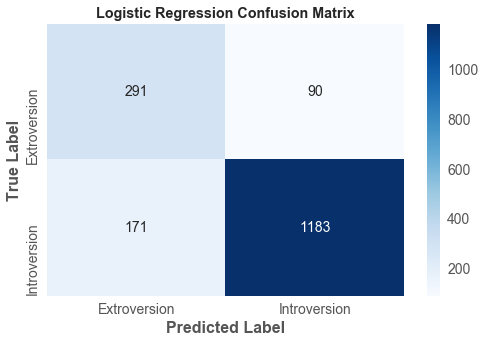

In [246]:
logreg_conf_mat = confusion_matrix(y_test_IE,y_pred_lr_CV_g_IE)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Extroversion', 'Introversion'], yticklabels=['Extroversion', 'Introversion'])
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Logistic Regression with Tf-Idf Vectorizing for Introversion vs Extroversion

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> Without GridSearch

In [416]:
logreg_TV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_lr_TV_IE = logreg_CV_IE.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_TV_IE))

Accuracy : 0.780403458213


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;"> With GridSearch

In [248]:
parameters = {'penalty':('l1','l2'), 'C':[0.05, 0.5, 1, 5, 10, 100, 1000]}

lr_classifierTV_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_g_IE = GridSearchCV(estimator=lr_classifierTV_IE, param_grid=parameters, cv=5)

In [249]:
logreg_TV_g_IE.fit(tfidf_vect_train, y_train_IE)
y_pred_lr_TV_g_IE = logreg_TV_g_IE.predict(tfidf_vect_test)
print (classification_report(y_test_IE, y_pred_lr_TV_g_IE))
print ('_____________________________________________')
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_lr_TV_g_IE))

             precision    recall  f1-score   support

          0       0.63      0.76      0.69       381
          1       0.93      0.88      0.90      1354

avg / total       0.86      0.85      0.86      1735

_____________________________________________
Accuracy : 0.851296829971


In [250]:
logreg_TV_g_IE.best_params_

{'C': 0.5, 'penalty': 'l1'}

# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intuition vs. Sensing

In [436]:
X_train, X_test, y_train_NS, y_test_NS = train_test_split(df_2['clean_text'], df_2['NS'], test_size=0.2, random_state=33)

In [433]:
df_2.NS.value_counts()

1    7478
0    1197
Name: NS, dtype: int64

## Logistic Regression with CountVectorizing for Intuition vs Sensing

In [434]:
logreg_CV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_NS.fit(count_vect_train, y_train_NS)
y_pred_lr_CV_NS = logreg_CV_NS.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_CV_NS))

Accuracy : 0.762536023055


## Logistic Regression with Tf-Idf Vectorizing for Intuition vs Sensing

In [435]:
logreg_TV_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_NS.fit(tfidf_vect_train, y_train_NS)
y_pred_lr_TV_NS = logreg_TV_NS.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_NS, y_pred_lr_TV_NS))

Accuracy : 0.746974063401


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Thinking vs. Feeling

In [437]:
X_train, X_test, y_train_TF, y_test_TF = train_test_split(df_2['clean_text'], df_2['TF'], test_size=0.2, random_state=33)

In [438]:
df_2.TF.value_counts()

0    4694
1    3981
Name: TF, dtype: int64

## Logistic Regression with CountVectorizing for Thinking vs Feeling

In [440]:
logreg_CV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_TF.fit(count_vect_train, y_train_TF)
y_pred_lr_CV_TF = logreg_CV_TF.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_CV_TF))

Accuracy : 0.806916426513


## Logistic Regression with Tf-Idf Vectorizing for Thinking vs Feeling

In [442]:
logreg_TV_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_TF.fit(tfidf_vect_train, y_train_TF)
y_pred_lr_TV_TF = logreg_TV_TF.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_TF, y_pred_lr_TV_TF))

Accuracy : 0.841498559078


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Judging vs. Perceiving

In [443]:
X_train, X_test, y_train_JP, y_test_JP = train_test_split(df_2['clean_text'], df_2['JP'], test_size=0.2, random_state=33)

In [444]:
df_2.JP.value_counts()

0    5241
1    3434
Name: JP, dtype: int64

In [76]:
5241/(5241+3434)

0.604149855907781

## Logistic Regression with CountVectorizing for Judging vs Perceiving

In [445]:
logreg_CV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_JP.fit(count_vect_train, y_train_JP)
y_pred_lr_CV_JP = logreg_CV_JP.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_CV_JP))

Accuracy : 0.738328530259


## Logistic Regression with Tf-Idf Vectorizing for Judging vs Perceiving

In [446]:
logreg_TV_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_JP.fit(tfidf_vect_train, y_train_JP)
y_pred_lr_TV_JP = logreg_TV_TF.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test_JP, y_pred_lr_TV_JP))

Accuracy : 0.496829971182


# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> PART-4: PREDICTIONS BY REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES

# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intoversion vs. Extroversion

In [448]:
X_train_1, X_test_1, y_train_1_IE, y_test_1_IE = train_test_split(df_2['clean_text_without_mbti'], df_2['IE'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Introversion vs Extroversion

In [450]:
logreg_CV_1_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_IE.fit(count_vect_train_1, y_train_1_IE)
y_pred_lr_CV_1_IE = logreg_CV_1_IE.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_lr_CV_1_IE))

Accuracy : 0.759077809798


## Logistic Regression with Tf-Idf Vectorizing for Introversion vs Extroversion

In [452]:
logreg_TV_1_IE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_IE.fit(tfidf_vect_train_1, y_train_1_IE)
y_pred_lr_TV_1_IE = logreg_TV_1_IE.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_IE, y_pred_lr_TV_1_IE))

Accuracy : 0.776368876081


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Intuition vs. Sensing

In [453]:
X_train_1, X_test_1, y_train_1_NS, y_test_1_NS = train_test_split(df_2['clean_text_without_mbti'], df_2['NS'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Intuition vs Sensing

In [454]:
logreg_CV_1_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_NS.fit(count_vect_train_1, y_train_1_NS)
y_pred_lr_CV_1_NS = logreg_CV_1_NS.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_lr_CV_1_NS))

Accuracy : 0.817291066282


## Logistic Regression with Tf-Idf Vectorizing for Intuition vs Sensing

In [455]:
logreg_TV_1_NS = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_NS.fit(tfidf_vect_train_1, y_train_1_NS)
y_pred_lr_TV_1_NS = logreg_TV_1_NS.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_NS, y_pred_lr_TV_1_NS))

Accuracy : 0.825360230548


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Thinking vs. Feeling

In [466]:
X_train_1, X_test_1, y_train_1_TF, y_test_1_TF = train_test_split(df_2['clean_text_without_mbti'], df_2['TF'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Thinking vs Feeling

In [467]:
logreg_CV_1_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_TF.fit(count_vect_train_1, y_train_1_TF)
y_pred_lr_CV_1_TF = logreg_CV_1_TF.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_lr_CV_1_TF))

Accuracy : 0.753314121037


## Logistic Regression with Tf-Idf Vectorizing for Thinking vs Feeling¶

In [468]:
logreg_TV_1_TF = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_TF.fit(tfidf_vect_train_1, y_train_1_TF)
y_pred_lr_TV_1_TF = logreg_TV_1_TF.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_TF, y_pred_lr_TV_1_TF))

Accuracy : 0.78386167147


# <p><span style="color: Red; font-family: Babas; font-size: 1.2em;"> Judging vs. Perceiving

In [469]:
X_train_1, X_test_1, y_train_1_JP, y_test_1_JP = train_test_split(df_2['clean_text_without_mbti'], df_2['JP'], test_size=0.2, random_state=33)

## Logistic Regression with CountVectorizing for Judging vs Perceiving¶

In [470]:
logreg_CV_1_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV_1_JP.fit(count_vect_train_1, y_train_1_JP)
y_pred_lr_CV_1_JP = logreg_CV_1_JP.predict(count_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_lr_CV_1_JP))

Accuracy : 0.651296829971


## Logistic Regression with CountVectorizing for Judging vs Perceiving¶

In [473]:
logreg_TV_1_JP = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV_1_JP.fit(tfidf_vect_train_1, y_train_1_JP)
y_pred_lr_TV_1_JP = logreg_TV_1_JP.predict(tfidf_vect_test_1)
print('Accuracy :', metrics.accuracy_score(y_test_1_JP, y_pred_lr_TV_1_JP))

Accuracy : 0.689337175793


## Random Forest with CountVectorizing for Introversion vs Extroversion

In [115]:
rf_CV_IE = RandomForestClassifier(random_state=0)

In [116]:
rf_CV_IE.fit(count_vect_train_IE, y_train_IE)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
y_pred_rf_CV_IE = rf_CV_IE.predict(count_vect_test_IE)

In [122]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_rf_CV_IE))

Accuracy : 0.75734870317


## LinearSVM with CountVectorizing for Introversion vs Extroversion

In [111]:
ln_SVM_CV_IE = LinearSVC(random_state=0)
ln_SVM_CV_IE.fit(count_vect_train_IE, y_train_IE)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [112]:
y_pred_SVM_CV_IE = ln_SVM_CV_IE.predict(count_vect_test_IE)

In [114]:
print('Accuracy :', metrics.accuracy_score(y_test_IE, y_pred_SVM_CV_IE))

Accuracy : 0.733141210375


In [ ]:
logreg_CV = LogisticRegression(random_state=0)
results_rf = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)
y_pred_lr_CV = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)
print (classification_report(y_train, y_pred_lr_CV))
print ('_____________________________________________')
print ('_____________________________________________')
print ("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))
print ("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))
print ("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
results_lr = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

In [ ]:
y_pred_lr = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)

## Random Forest with CountVectorizing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_CV = RandomForestClassifier(random_state=0)

In [ ]:
results_rf = cross_validate(rf_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)
y_pred_rf = cross_val_predict(rf_CV, count_vect_train, y_train, n_jobs=-1)
print (classification_report(y_train, y_pred_lr))
print ('_____________________________________________')
print ('_____________________________________________')
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))
print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))
print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

In [ ]:
y_pred_rf = cross_val_predict(rf_CV, count_vect_train, y_train, n_jobs=-1)

In [ ]:
print (classification_report(y_train, y_pred_lr))

## LinearSVM with CountVectorizing

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
ln_SVM_CV = LinearSVC(random_state=0)
ln.SVM_CV.fit(count_vect_train, y_train)

In [ ]:
pred2 = clf_IE2.predict(xtrain)

## Logistic Regression (CV)

In [267]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}

lr_classifierCV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_CV = GridSearchCV(estimator=lr_classifierCV, param_grid=parameters, cv=kfolds, scoring=scoring, refit=False)
logreg_CV.fit(count_vect_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.005, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'acc': 'accuracy', 'neg_log_loss': 'neg_log_loss', 'f1_micro': 'f1_micro'},
       verbose=0)

In [117]:
results_lr = cross_validate(logreg_CV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [118]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

CV Accuracy  : 0.3562 
CV F1        : 0.3562 
CV Logloss   : 2.1550 


In [265]:
logreg_CV.best_estimators_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimators_'

In [182]:
y_pred_lr = cross_val_predict(logreg_CV, count_vect_train, y_train, n_jobs=-1)

In [184]:
print (classification_report(y_train, y_pred_lr))

             precision    recall  f1-score   support

       ENFJ       0.10      0.08      0.09       159
       ENFP       0.29      0.33      0.31       563
       ENTJ       0.17      0.14      0.15       181
       ENTP       0.26      0.26      0.26       540
       ESFJ       0.00      0.00      0.00        33
       ESFP       0.00      0.00      0.00        36
       ESTJ       0.33      0.03      0.06        32
       ESTP       0.00      0.00      0.00        74
       INFJ       0.39      0.38      0.38      1201
       INFP       0.46      0.50      0.48      1445
       INTJ       0.35      0.35      0.35       877
       INTP       0.39      0.41      0.40      1037
       ISFJ       0.11      0.10      0.10       136
       ISFP       0.13      0.12      0.12       213
       ISTJ       0.15      0.11      0.13       158
       ISTP       0.23      0.25      0.24       255

avg / total       0.34      0.34      0.34      6940



In [ ]:
"""parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}
lr = LogisticRegression(class_weight='balanced', random_state=0)               
logreg = GridSearchCV(estimator= lr, param_grid=parameters)
count_vect = CountVectorizer(min_df=0., max_df=1.)
model_lr = Pipeline([('count_vect', count_vect), ('logreg', logreg)])"""

## Naive Bayes (CV)

In [111]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierCV = MultinomialNB()
naive_bayesCV = GridSearchCV(estimator=nb_classifierCV, param_grid=parameters)

#naive_bayesCV.fit(count_vect_train, y_train)

#naive_bayesCV_pred = naive_bayesCV.predict(count_vect_test)

#metrics.accuracy_score(y_test, nb_pred)

In [112]:
#naive_bayesCV.best_estimator_

In [106]:
results_nb = cross_validate(naive_bayesCV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [107]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb['test_neg_log_loss'])))

CV Accuracy  : 0.3786 
CV F1        : 0.3786 
CV Logloss   : 10.3944 


In [115]:
"""parameters = {'alpha':[0.01, 0.1, 1]}
nb = MultinomialNB()
naive_bayes = GridSearchCV(estimator=nb, param_grid=parameters)
count_vect = CountVectorizer(min_df=0., max_df=1.)
model = Pipeline([('count_vect', count_vect), ('naive_bayes', naive_bayes)])"""

"parameters = {'alpha':[0.01, 0.1, 1]}\nnb = MultinomialNB()\nnaive_bayes = GridSearchCV(estimator=nb, param_grid=parameters)\ncount_vect = CountVectorizer(min_df=0., max_df=1.)\nmodel = Pipeline([('count_vect', count_vect), ('naive_bayes', naive_bayes)])"

## Random Forest (CV)

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
parameters = {'n_estimators':[200, 500, 750, 1000], 'max_depth':[3,5,7,]}

rf_CV = RandomForestClassifier(random_state=0)
rand_forestCV = GridSearchCV(estimator=rf_CV, param_grid=parameters)

In [121]:
#count_vect = CountVectorizer(min_df=0., max_df=1.)
#model = Pipeline([('count_vect', count_vect), ('rand_forest', rand_forest)])

In [123]:
results_rf = cross_validate(rand_forestCV, count_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [124]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

CV Accuracy  : 0.2339 
CV F1        : 0.2339 
CV Logloss   : 2.2096 


# WITH TF-IDF VECTORIZING

## Linear Regression (TF-IDF)

In [125]:
parameters = {'penalty':('l1','l2'), 'C':[0.005, 0.05, 0.5, 1]}

lr_classifierTV = LogisticRegression(class_weight='balanced', random_state=0)
logreg_TV = GridSearchCV(estimator=lr_classifierTV, param_grid=parameters)

In [126]:
results_lr = cross_validate(logreg_TV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [127]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_lr['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_lr['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_lr['test_neg_log_loss'])))

CV Accuracy  : 0.3812 
CV F1        : 0.3812 
CV Logloss   : 2.2137 


## Naive Bayes (TF-IDF)

In [128]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierTV = MultinomialNB()
naive_bayesTV = GridSearchCV(estimator=nb_classifierTV, param_grid=parameters)

In [129]:
results_nb = cross_validate(naive_bayesTV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [130]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb['test_neg_log_loss'])))

CV Accuracy  : 0.3396 
CV F1        : 0.3396 
CV Logloss   : 2.1288 


## Random Forest (TF-IDF)

In [131]:
parameters = {'n_estimators':[200, 500, 750, 1000], 'max_depth':[3,5,7,]}

rf_TV = RandomForestClassifier(random_state=0)
rand_forestTV = GridSearchCV(estimator=rf_TV, param_grid=parameters)

In [132]:
results_rf = cross_validate(rand_forestTV, tfidf_vect_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [133]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_rf['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_rf['test_neg_log_loss'])))

CV Accuracy  : 0.2382 
CV F1        : 0.2382 
CV Logloss   : 2.2109 


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200)
# fit the training data
gbc.fit (tfidf_vect_train, y_train)
# get the predicted values from the test set
y_pred = gbc.predict(tfidf_vect_test)

metrics.accuracy_score(y_test, y_pred)

# Intoversion Vs. Extroversion

In [200]:
# If a person is Introversion it is shown in the IE column as 1 and Extroversion is depiected as 0

X_train_IE, X_test_IE, y_train_IE, y_test_IE = train_test_split(df_2['clean_text'], df_2['IE'], test_size=0.2, random_state=101)

## Logistic Regression with CountVectorizer for Introversion vs Extroversion

In [203]:
count_vect = CountVectorizer(max_features=5000, ngram_range=(1,3))
count_vect_train = count_vect.fit_transform(X_train_IE)
count_vect_train = count_vect_train.toarray()

count_vect_test = count_vect.transform(X_test_IE)

In [194]:
df_2['IE'].value_counts()

1    6676
0    1999
Name: IE, dtype: int64

In [212]:
parameters = {'C':[0.005, 0.01, 0.05, 0.1, 0.5, 1]}

lr_classifierIE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_IE = GridSearchCV(estimator=lr_classifierIE, param_grid=parameters)

#lr_IE = LogisticRegression(class_weight='balanced')

In [213]:
logreg_IE.fit(count_vect_train,y_train_IE)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [214]:
y_pred= logreg_IE.predict(count_vect_test)

In [215]:
metrics.accuracy_score(y_test_IE, y_pred)

0.73948126801152736

## Naive Bayes for Introversion vs Extroversion

In [260]:
parameters = {'alpha':[0.01, 0.1, 1]}

nb_classifierCV_IE = MultinomialNB()
naive_bayesCV_IE = GridSearchCV(estimator=nb_classifierCV_IE, param_grid=parameters)

In [263]:
results_nb_IE = cross_validate(naive_bayesCV_IE, count_vect_train, y_train_IE, cv=kfolds, scoring=scoring, n_jobs=-1)

In [264]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results_nb_IE['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results_nb_IE['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results_nb_IE['test_neg_log_loss'])))

CV Accuracy  : 0.7024 
CV F1        : 0.7024 
CV Logloss   : 3.1760 


## Logistic Regression with TF-IDF for Introversion vs Extroversion

In [216]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0., max_df=1., use_idf=True, max_features=10000)
tfidf_vect_train = tfidf_vect.fit_transform(X_train_IE)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test_IE)

In [217]:
parameters = {'C':[0.005, 0.01, 0.05, 0.1, 0.5, 1]}

lr_classifierIE = LogisticRegression(class_weight='balanced', random_state=0)
logreg_IE = GridSearchCV(estimator=lr_classifierIE, param_grid=parameters)

In [221]:
logreg_IE.fit(tfidf_vect_train,y_train_IE)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [222]:
y_pred= logreg_IE.predict(tfidf_vect_test)

In [223]:
metrics.accuracy_score(y_test_IE, y_pred)

0.74351585014409227

## SVC

In [237]:
print(len(X_train_IE))

6940


In [238]:
print(len(X_test_IE))

1735


In [253]:
print(len(y_train))

6940


In [257]:
intra_num_IE = np.sum(y_train_IE)
extra_num_IE = np.sum(1-y_train_IE)
sample_size = len(y_train_IE)
print(extra_num_IE)
print(intra_num_IE)

print(extra_num_IE/sample_size)
print(intra_num_IE/sample_size)

#inverseWeight_IE = np.ravel((extra_num_IE/sample_size)*y_train+(intra_num_IE/sample_size)*(1-y_train))

#print(len(inverseWeight_IE))
#print(inverseWeight_IE)

1597
5343
0.230115273775
0.769884726225


In [ ]:
from sklearn.svm import SVC
clf_IE2 = SVC(random_state=0).fit(tfidf_vect_train, y_train_IE )
y_pred = clf_IE2.predict(tfidf_vect_test)

In [232]:
metrics.accuracy_score(y_test_IE, y_pred)

0.78674351585014413

## ExtraTreesClassifier with SVD¶

In [ ]:
parameters = {'n_estimators':[10,20,50,100,200], 'max_depth':[3,5,7]}
ext_tree = ExtraTreesClassifier(n_jobs=-1)               
etc = GridSearchCV(estimator= ext_tree, param_grid=parameters)
tfidf = TfidfVectorizer(ngram_range=(1, 1))
tsvd = TruncatedSVD(n_components=10)
model = Pipeline([('tfidf', tfidf), ('tsvd', tsvd), ('etc', etc)])

In [ ]:
results = cross_validate(model, X_train, y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy  : {:0.4f} ".format(np.mean(results['test_acc'])))

print("CV F1        : {:0.4f} ".format(np.mean(results['test_f1_micro'])))

print("CV Logloss   : {:0.4f} ".format(np.mean(-1*results['test_neg_log_loss'])))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200)
# fit the training data
gbc.fit (tfidf_vect_train, y_train)
# get the predicted values from the test set
y_pred = gbc.predict(tfidf_vect_test)

metrics.accuracy_score(y_test, y_pred)

In [ ]:
## Introversion Vs. Extraversion